# Часть I. Односторонние разностные схемы.

Напишите функцию `deriv`, которая вычисляет производную аргумента в заданной точке $x$, используя односторонню разностную схему с заданным шагом $h$ и степенью аппроксимации $O(h^2)$.

In [1]:
def deriv(f, x, h):
    """ Вычисляет производную `f` в точке `x` с шагом `h`.
    Вычисляет производную, используя односторонню разностную схему со степенью аппроксимации $O(h^2)$.
    
    Parameters
    ----------
    f : callable
        Функция, которую нужно продифференцировать
    x : float
        Точка, в которой нужно дифференцировать функцию
    h : float
        Шаг
        
    Rerurns
    -------
    fder : производная f(x) в точке x с шагом h.
    """
    return (-1.5 * f(x) + 2 * f(x+h) - 0.5 * f(x+ 2*h)) / h

#### Тест I.1

Проверьте ваш алгоритм на простом примере: продифференцируйте $f(x) = x^3$ в точке $x=0$. Прокомментируйте, совпадает ли результат с ожидаемым $f'(x) = 0$ при стремлении $h\to 0$.

 (10% итоговой оценки)

In [2]:
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(lambda x: x**3, x, h)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.0002
0.001000 --  -2e-06
0.000100 --  -2e-08
0.000010 --  -2e-10


Ошибка ведет себя как квадратичная функция шага (как и должно быть)

### Тест I.2

Теперь попробуйте немного более сложную функцию $f(x) = x^2 \log{x}$. Оцените значение производной в точке $x=1$, используя двухточечную и трехточечную схемы. Для обеих схем оцените значение $h$, при котором ошибка перестанет падать.

(15% итоговой оценки)

In [33]:
from math import log

def f(x):
    return x**2 * log(x)
    
def fder(x):
    return x * (2.*log(x) + 1)

def deriv_c(f, x, h):
    return (f(x + h) - f(x)) / h

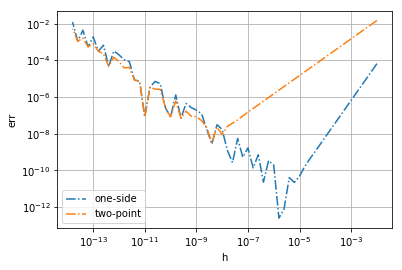

In [55]:


import numpy as np
import matplotlib.pyplot as plt

h = [10**(-x) for x in np.arange(2,14,0.2, dtype=float)]

err_1 = [abs(deriv  (f,1,i) - fder(1)) for i in h]
err_2 = [abs(deriv_c(f,1,i) - fder(1)) for i in h]

plt.plot(h, err_1, '-.', label = "one-side")
plt.plot(h, err_2, '-.', label = "two-point")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("h")
plt.ylabel("err")
plt.grid()
plt.legend()
plt.show()

### Тест I.3 

Теперь продифференцируйте $x^2 \log(x)$ в $x=0$. Используйте трехточечную схему. Заметьте, что В нуле функцию нужно доопределить явным образом. Проверьте шкалированные ошибки. Объясните полученные результаты.

(25% итоговой оценки)

In [50]:
def f(x):
    if x == 0:
        # предел $x^2 log(x)$ при $x-> 0$ равен нулю, хотя log(x) не определен в x=0
        return 0.0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x*(2*log(x) + 1)

x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(f, x, h) - fder(x)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.01386
0.001000 -- -0.001386
0.000100 -- -0.0001386
0.000010 -- -1.386e-05


Сходимость линейная, так как слагаемые разложения с производными третьего и выше порядков пропорциональны ~h. Для сравнения, в первом примере слагаемое с третьей  производной давала порядок h^2, что в принципе мы и ожидали увидеть.

# Part II. Midpoint rule 

Напишите функцию, вычисляющую определенный интеграл, используя "midpoint rule", с точностью до заданной погрешности $\epsilon$. Оцените ошибку, сравнивая значения интеграла для $N$ и $2N$ элементарных интервалов.

In [93]:
def midpoint_rule(func, a, b, eps):
    """ Вычисляет интеграл f от a до b используя "midpoint rule".
    
    Параметры
    ----------
    func : callable
        Функция, которую нужно проинтегрировать
    a : float
        Нижний предел интегрирования
    b : float
        Верхний предел интегрирования
    eps : float
        Ожидаемая ошибка оценки
        
    Возвращает
    -------
    integral : float
        Оценка интеграла $\int_a^b f(x) dx$.
    """
    
    S = (b-a)*func((a+b)/2)
    
    for N in range(3, 100000):
        dots = np.linspace(a, b, N)
        midpoints = (dots[1:]+dots[:-1])/2
        S_new = (b-a)/N * np.sum(func(midpoints))
        
        #Check eps and stop
        if abs(S_new-S)<eps:
            return [S_new, N]
        S = S_new
 

### Тест II.1

Протестирутйте ваш алгоритм на простом интеграле, который вы можете посчитать аналитически.

Сравните скорость сходимости с ожидаемой $O(N^{-2})$ в зависимости от количества интервалов, необходимых для заданной точности $\epsilon$.

Сравните полученный результат с ответом, вычисленным руками. Попадает ли результат в интервал заданной ошибки?

(20% итоговой оценки)


In [94]:
for eps in np.linspace(1e-6, 1e-3, 10):
    print(midpoint_rule(lambda x: 4*x**3 , 0, 1, eps))

# (Integral, partition number)

[0.9990014975044913, 1002]
[0.9895285087719297, 96]
[0.9851843722563652, 68]
[0.9819805194805193, 56]
[0.97937925170068, 49]
[0.9770084566596196, 44]
[0.974679487179487, 40]
[0.9725975975975973, 37]
[0.9710084033613445, 35]
[0.9692234848484849, 33]


### Тест II.2

Используя ваш алгоритм, посчитайте значение

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

с точностью до $\epsilon=10^{-4}$.

Заметим, что интеграл содержит интегрируемую особенность в нижнем пределе. Выполните вычисление двумя способами: во первых, посчитайте интеграл "в лоб", во вторых, вычтите особенность из подынтегрального выражения. Сравните количество необходимых итераций для достижения заданной точности $\epsilon$.

(30% итоговой оценки)

In [62]:
midpoint_rule(lambda x: np.sin(np.sqrt(x))/x , 0, 1, 0.00001)

(1.8721165012592882, 1090)

In [100]:
def func_original(x):
    return np.sin(np.sqrt(x))/x

def func_fixed(x):
    return func_original(x)-np.sqrt(1/x)

singularity = [2.0, 0]
result = np.sum([midpoint_rule(func_fixed , 0, 1, 0.00001), singularity], axis=0)
result

array([  1.89319367, 104.        ])

In [ ]:
# Уже можно видеть, что колличество разбиений отличается на порядок, учитывая еще и то,
# что во втором случае мы имеем более приближенный к реальному результат